2024-09-11 08:32:26.151193: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 08:32:26.171946: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 08:32:26.275100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 08:32:26.359553: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-11 08:32:26.372568: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-11 08:32:28.431911: W tensorflow/compiler/tf2tensorrt/utils/p

bug
0    579
1    166
Name: count, dtype: int64
After applying SMOTE:
bug
1    579
0    579
Name: count, dtype: int64


/home/kuki/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5423 - loss: 0.7421 - val_accuracy: 0.6172 - val_loss: 0.6889
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6646 - loss: 0.6212 - val_accuracy: 0.6793 - val_loss: 0.6559
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6848 - loss: 0.5732 - val_accuracy: 0.7103 - val_loss: 0.6451
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7296 - loss: 0.5403 - val_accuracy: 0.7241 - val_loss: 0.6415
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7340 - loss: 0.5254 - val_accuracy: 0.7172 - val_loss: 0.6382
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7497 - loss: 0.4983 - val_accuracy: 0.7138 - val_loss: 0.6314
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7448 - loss: 0.5150 - val_accuracy: 0.7207 - val_loss: 0.6283
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7765 - loss: 0.4904 - val_accuracy: 0.7241 - val_loss

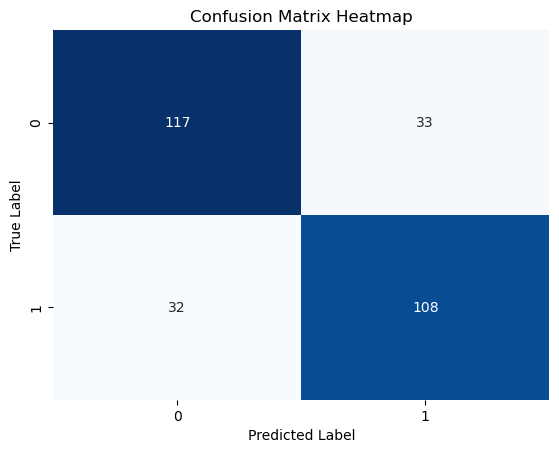

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       150
           1       0.77      0.77      0.77       140

    accuracy                           0.78       290
   macro avg       0.78      0.78      0.78       290
weighted avg       0.78      0.78      0.78       290

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


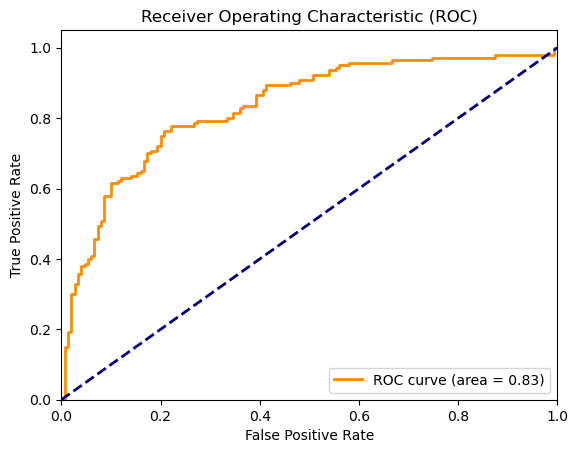

Area Under Curve (AUC): 0.8328095238095239


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# 1. Load the dataset and check for class imbalance
file_path = 'antfile17-Copy1.csv'
data = pd.read_csv(file_path)

# Display class counts (bug vs no bug)
print(data['bug'].value_counts())

# Separate features and target
X = data.iloc[:, :-1]  # Features (all except last column)
y = data.iloc[:, -1]   # Target (last column)

# Apply SMOTE to balance the dataset if needed
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution after SMOTE
print("After applying SMOTE:")
print(pd.Series(y_resampled).value_counts())

# 2. Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Perform scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Build a Sequential model (4 layers: input, 2 hidden, output)
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=16, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Second hidden layer
model.add(Dense(units=8, activation='relu'))

# Output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

# 4. Model evaluation
# Training and Testing accuracy
train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 5. Visualizing Confusion Matrix using Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# 7. Build ROC Curve and calculate AUC score
y_pred_prob = model.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"Area Under Curve (AUC): {roc_auc}")
